In [23]:
import sys

from models.agent import Agent
from models.model_transformers import Model_args
import pickle
import torch


dataset = 'dataset/one_ball.pkl'

with open(dataset, 'rb') as f:
    dataset = pickle.load(f)
    
states, states_white, labels = dataset['states'], dataset['states_white'], dataset['label']

states_white = [ s.unsqueeze(0) for s in states_white]
states = [ s.unsqueeze(0) for s in states]
labels = [ s.unsqueeze(0) for s in labels]


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 256

states = torch.concatenate(states).to(device)
states_white = torch.concatenate(states_white).to(device)
labels = torch.concatenate(labels).to(device)


model_args = Model_args(
    embed_dim = 128,
    num_heads = 4,
    ff_dim    = 256,
    num_layers =2,
    dropout  = 0,
    mlp_dim=128,
)


agent = Agent(action_dim=2, model_args=model_args).to(device)



#print("WARNING - APLICANDO NORMALIZAÇÃO NO DATASET")
#states[:,:,0] = states[:,:,0] / 800
#states[:,:,1] = states[:,:,1] / 400
#states_white[:,0] = states_white[:,0] / 800
#states_white[:,1] = states_white[:,1] / 400
# -------------------------
epochs = 50
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(agent.parameters(), lr=0.001)


split_idx = 14000
test_states = states[split_idx:]
test_states_white = states_white[split_idx:]
test_labels = labels[split_idx:]
train_states = states[:split_idx]
train_states_white = states_white[:split_idx]
train_labels = labels[:split_idx]

In [24]:
    
def evaluate(agent):
    agent.eval()  # Coloca o modelo em modo de avaliação

    with torch.no_grad():
        output = agent.actor_mean(test_states, test_states_white)
        mse = torch.nn.functional.mse_loss(output[:,0], test_labels[:,0])

    return mse.item()


In [25]:
from tqdm import tqdm
losses = []
losses_test = []

losses_test.append(evaluate(agent))
print(f" Loss Test: {losses_test[-1]}")


for epc in range(epochs):
    agent.train()
    for i in tqdm(range(0, len(states), batch_size)):
        batch_states = states[i:i+batch_size]
        batch_states_white = states_white[i:i+batch_size]
        batch_label = labels[i:i+batch_size]
         
        output = agent.actor_mean(batch_states, batch_states_white)
        output = output[:,0]
        batch_label = batch_label[:,0]
        loss_value = loss(output, batch_label)
        
        
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        losses.append(loss_value.item())
    
    losses_test.append(evaluate(agent))
    print(f"Epoch {epc} - Loss: {losses[-1]} - Loss Test: {losses_test[-1]}")

 Loss Test: 3.7060179710388184


100%|██████████| 59/59 [00:04<00:00, 14.00it/s]


Epoch 0 - Loss: 2.7780258655548096 - Loss Test: 2.5777459144592285


100%|██████████| 59/59 [00:04<00:00, 14.49it/s]


Epoch 1 - Loss: 1.946415901184082 - Loss Test: 2.0201053619384766


100%|██████████| 59/59 [00:04<00:00, 13.85it/s]


Epoch 2 - Loss: 1.8456544876098633 - Loss Test: 1.8197003602981567


100%|██████████| 59/59 [00:04<00:00, 14.22it/s]


Epoch 3 - Loss: 1.7667720317840576 - Loss Test: 1.6721266508102417


100%|██████████| 59/59 [00:04<00:00, 13.49it/s]


Epoch 4 - Loss: 1.6821489334106445 - Loss Test: 1.5387485027313232


100%|██████████| 59/59 [00:04<00:00, 14.04it/s]


Epoch 5 - Loss: 1.5363644361495972 - Loss Test: 1.3774536848068237


100%|██████████| 59/59 [00:03<00:00, 15.07it/s]


Epoch 6 - Loss: 1.4993081092834473 - Loss Test: 1.2554566860198975


100%|██████████| 59/59 [00:04<00:00, 13.52it/s]


Epoch 7 - Loss: 1.3864243030548096 - Loss Test: 1.1117976903915405


100%|██████████| 59/59 [00:04<00:00, 13.39it/s]


Epoch 8 - Loss: 1.3791477680206299 - Loss Test: 1.072182059288025


100%|██████████| 59/59 [00:04<00:00, 13.09it/s]


Epoch 9 - Loss: 1.2986725568771362 - Loss Test: 1.1106348037719727


100%|██████████| 59/59 [00:03<00:00, 16.72it/s]


Epoch 10 - Loss: 1.0484896898269653 - Loss Test: 1.2085047960281372


100%|██████████| 59/59 [00:03<00:00, 16.37it/s]


Epoch 11 - Loss: 0.9989051818847656 - Loss Test: 1.0250247716903687


100%|██████████| 59/59 [00:04<00:00, 13.27it/s]


Epoch 12 - Loss: 0.924372136592865 - Loss Test: 0.9177011847496033


100%|██████████| 59/59 [00:03<00:00, 16.72it/s]


Epoch 13 - Loss: 0.8251908421516418 - Loss Test: 0.8613892197608948


100%|██████████| 59/59 [00:03<00:00, 16.20it/s]


Epoch 14 - Loss: 0.7338525056838989 - Loss Test: 0.8772268891334534


100%|██████████| 59/59 [00:03<00:00, 16.21it/s]


Epoch 15 - Loss: 0.6905477643013 - Loss Test: 0.8328368067741394


100%|██████████| 59/59 [00:03<00:00, 16.82it/s]


Epoch 16 - Loss: 0.7185709476470947 - Loss Test: 0.7641663551330566


100%|██████████| 59/59 [00:03<00:00, 17.10it/s]


Epoch 17 - Loss: 0.6722943186759949 - Loss Test: 0.6949763894081116


100%|██████████| 59/59 [00:03<00:00, 15.69it/s]


Epoch 18 - Loss: 0.5763494372367859 - Loss Test: 0.7117083668708801


100%|██████████| 59/59 [00:03<00:00, 16.58it/s]


Epoch 19 - Loss: 0.5871229767799377 - Loss Test: 0.7015414834022522


100%|██████████| 59/59 [00:03<00:00, 16.61it/s]


Epoch 20 - Loss: 0.5504080057144165 - Loss Test: 0.69072425365448


100%|██████████| 59/59 [00:03<00:00, 16.55it/s]


Epoch 21 - Loss: 0.5309578776359558 - Loss Test: 0.6476569771766663


100%|██████████| 59/59 [00:03<00:00, 16.49it/s]


Epoch 22 - Loss: 0.555142879486084 - Loss Test: 0.6153392195701599


100%|██████████| 59/59 [00:03<00:00, 16.21it/s]


Epoch 23 - Loss: 0.7439706325531006 - Loss Test: 0.5443152189254761


100%|██████████| 59/59 [00:03<00:00, 15.38it/s]


Epoch 24 - Loss: 0.705413818359375 - Loss Test: 0.5572931170463562


100%|██████████| 59/59 [00:03<00:00, 16.76it/s]


Epoch 25 - Loss: 0.5538376569747925 - Loss Test: 0.6520857214927673


100%|██████████| 59/59 [00:03<00:00, 15.36it/s]


Epoch 26 - Loss: 0.8649453520774841 - Loss Test: 0.592054009437561


100%|██████████| 59/59 [00:03<00:00, 15.64it/s]


Epoch 27 - Loss: 0.7298555970191956 - Loss Test: 0.6178493499755859


100%|██████████| 59/59 [00:03<00:00, 15.99it/s]


Epoch 28 - Loss: 0.4766828715801239 - Loss Test: 0.5947167277336121


100%|██████████| 59/59 [00:03<00:00, 16.45it/s]


Epoch 29 - Loss: 0.44857844710350037 - Loss Test: 0.46167510747909546


100%|██████████| 59/59 [00:03<00:00, 15.79it/s]


Epoch 30 - Loss: 0.6471794247627258 - Loss Test: 0.590126097202301


100%|██████████| 59/59 [00:03<00:00, 15.25it/s]


Epoch 31 - Loss: 0.573672354221344 - Loss Test: 0.5962269306182861


100%|██████████| 59/59 [00:03<00:00, 15.82it/s]


Epoch 32 - Loss: 0.37204840779304504 - Loss Test: 0.49172118306159973


100%|██████████| 59/59 [00:03<00:00, 15.77it/s]


Epoch 33 - Loss: 0.403476357460022 - Loss Test: 0.5186152458190918


100%|██████████| 59/59 [00:03<00:00, 16.61it/s]


Epoch 34 - Loss: 0.40472766757011414 - Loss Test: 0.5362159609794617


100%|██████████| 59/59 [00:04<00:00, 14.74it/s]


Epoch 35 - Loss: 0.3685842454433441 - Loss Test: 0.4781327545642853


100%|██████████| 59/59 [00:03<00:00, 15.53it/s]


Epoch 36 - Loss: 0.3527649939060211 - Loss Test: 0.49804529547691345


100%|██████████| 59/59 [00:03<00:00, 15.24it/s]


Epoch 37 - Loss: 0.2898022532463074 - Loss Test: 0.5175190567970276


100%|██████████| 59/59 [00:03<00:00, 16.25it/s]


Epoch 38 - Loss: 0.29898619651794434 - Loss Test: 0.4717637002468109


100%|██████████| 59/59 [00:04<00:00, 14.16it/s]


Epoch 39 - Loss: 0.2876063883304596 - Loss Test: 0.44416916370391846


100%|██████████| 59/59 [00:03<00:00, 16.91it/s]


Epoch 40 - Loss: 0.277153342962265 - Loss Test: 0.40587902069091797


100%|██████████| 59/59 [00:03<00:00, 15.74it/s]


Epoch 41 - Loss: 0.4344143569469452 - Loss Test: 0.4649496376514435


100%|██████████| 59/59 [00:03<00:00, 15.09it/s]


Epoch 42 - Loss: 0.26773881912231445 - Loss Test: 0.4336700141429901


100%|██████████| 59/59 [00:03<00:00, 15.93it/s]


Epoch 43 - Loss: 0.29438477754592896 - Loss Test: 0.39626044034957886


100%|██████████| 59/59 [00:03<00:00, 15.83it/s]


Epoch 44 - Loss: 0.30675095319747925 - Loss Test: 0.39833346009254456


100%|██████████| 59/59 [00:03<00:00, 16.26it/s]


Epoch 45 - Loss: 0.2620416581630707 - Loss Test: 0.34518203139305115


100%|██████████| 59/59 [00:03<00:00, 14.95it/s]


Epoch 46 - Loss: 0.3067367672920227 - Loss Test: 0.40876007080078125


100%|██████████| 59/59 [00:03<00:00, 15.68it/s]


Epoch 47 - Loss: 0.2626704275608063 - Loss Test: 0.35981279611587524


100%|██████████| 59/59 [00:03<00:00, 16.29it/s]


Epoch 48 - Loss: 0.28962650895118713 - Loss Test: 0.3386096656322479


100%|██████████| 59/59 [00:03<00:00, 16.60it/s]


Epoch 49 - Loss: 0.32232609391212463 - Loss Test: 0.3929191529750824


In [18]:
x = states[0].unsqueeze(0)
bola_branca = states_white[0].unsqueeze(0)
b = x.shape[0]
        
t_concat = torch.zeros(b,2, device=bola_branca.device)
t_concat[:,0] = 1
t_concat[:,1] = -1

bola_branca = torch.concat( (bola_branca , t_concat), dim=-1).unsqueeze(1)
x = torch.concat((bola_branca,x),dim=1)

# [b, 16, 4]
x = x.view(b,-1)
x.shape

torch.Size([1, 64])

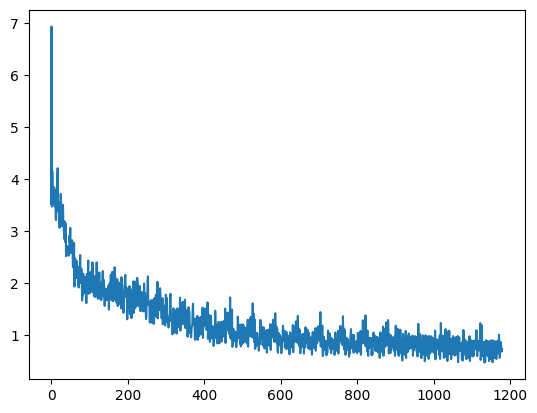

In [21]:
import matplotlib.pyplot as plt 

plt.plot(losses)

In [26]:
# save model
torch.save(agent.state_dict(), 'agent_big3.pth')